In [2]:
import pandas as pd

df = pd.read_csv('churn.csv')
df

,user_id,age,gender,join_date,last_active,purchases,churned
0,1001,18,F,2023-01-01,2023-06-01,2,0
1,1002,21,M,2023-01-02,2023-05-31,2,0
2,1003,21,M,2023-01-03,2023-05-30,2,1
3,1004,57,F,2023-01-04,2023-05-29,3,1
4,1005,27,M,2023-01-05,2023-05-28,0,0
...,...,...,...,...,...,...,...
95,1096,48,F,2023-04-06,2023-02-26,0,0
96,1097,18,M,2023-04-07,2023-02-25,2,0
97,1098,54,F,2023-04-08,2023-02-24,3,0
98,1099,52,M,2023-04-09,2023-02-23,3,0


In [3]:
# 데이터프레임 구조 확인
print(df.info())
print(df.describe(include='all'))

# 결측치 확인
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      100 non-null    int64 
 1   age          100 non-null    int64 
 2   gender       100 non-null    object
 3   join_date    100 non-null    object
 4   last_active  100 non-null    object
 5   purchases    100 non-null    int64 
 6   churned      100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB
None
            user_id         age gender   join_date last_active   purchases  \
count    100.000000  100.000000    100         100         100  100.000000   
unique          NaN         NaN      2         100         100         NaN   
top             NaN         NaN      M  2023-01-01  2023-06-01         NaN   
freq            NaN         NaN     57           1           1         NaN   
mean    1050.500000   37.890000    NaN         NaN         NaN    2.010000   
std  

In [4]:
# 전체 이탈율 계산 및 출력
churn_rate = df['churned'].mean()
print(f"전체 이탈율: {churn_rate:.2%}")

전체 이탈율: 30.00%


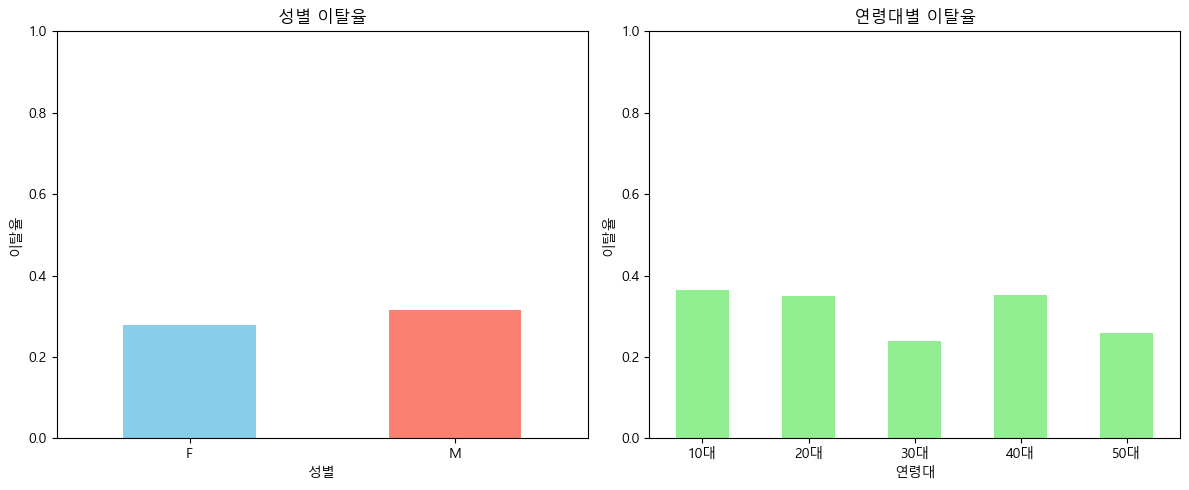

In [6]:
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')  # 윈도우의 경우 'Malgun Gothic' 사용
plt.rc('axes', unicode_minus=False)     # 마이너스(-) 깨짐 방지

# ...existing code...
# 성별 이탈율
gender_churn = df.groupby('gender')['churned'].mean()

# 연령대별 이탈율 (10살 단위로 구간화)
df['age_group'] = (df['age'] // 10) * 10
age_churn = df.groupby('age_group')['churned'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 성별 이탈율 그래프
gender_churn.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('성별 이탈율')
axes[0].set_ylabel('이탈율')
axes[0].set_xlabel('성별')
axes[0].set_ylim(0, 1)
axes[0].set_xticklabels(gender_churn.index, rotation=0)

# 연령대별 이탈율 그래프
age_churn.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('연령대별 이탈율')
axes[1].set_ylabel('이탈율')
axes[1].set_xlabel('연령대')
axes[1].set_ylim(0, 1)
axes[1].set_xticklabels([f"{int(age)}대" for age in age_churn.index], rotation=0)

plt.tight_layout()
plt.show()

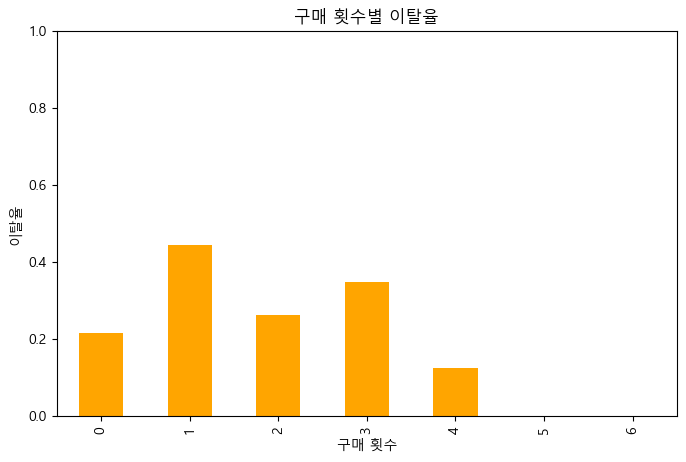

In [7]:
# purchases별 이탈율 계산
purchases_churn = df.groupby('purchases')['churned'].mean()

# 히스토그램 그리기
plt.figure(figsize=(8, 5))
purchases_churn.plot(kind='bar', color='orange')
plt.title('구매 횟수별 이탈율')
plt.xlabel('구매 횟수')
plt.ylabel('이탈율')
plt.ylim(0, 1)
plt.show()

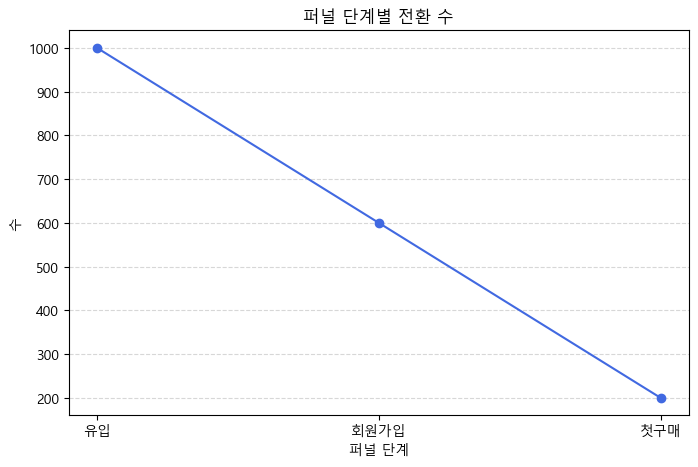

In [8]:
# 퍼널 단계별 값 정의
funnel_steps = ['유입', '회원가입', '첫구매']
funnel_counts = [1000, 600, 200]

# 데이터프레임 생성
funnel_df = pd.DataFrame({'단계': funnel_steps, '수': funnel_counts})

# 선형 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(funnel_df['단계'], funnel_df['수'], marker='o', linestyle='-', color='royalblue')
plt.title('퍼널 단계별 전환 수')
plt.xlabel('퍼널 단계')
plt.ylabel('수')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 성별을 0, 1로 변환 (여성: 0, 남성: 1)
df['gender_bin'] = df['gender'].map({'F': 0, 'M': 1})


# feature와 target 설정
X = df[['gender_bin', 'age', 'purchases']]
y = df['churned']

# train/test 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 평가
print("정확도:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

정확도: 0.7
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        14
           1       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20



c:\Users\admin\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\admin\anaconda3\envs\test\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


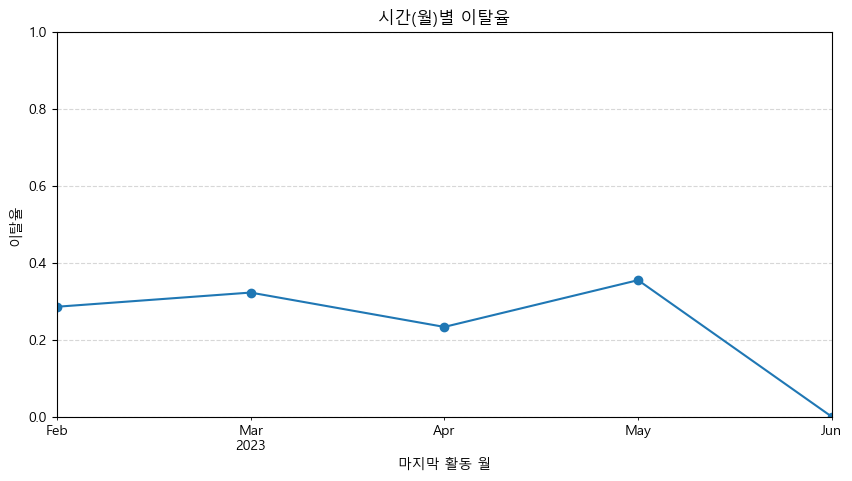

In [10]:
# 'join_date'와 'last_active'를 datetime으로 변환
df['join_date'] = pd.to_datetime(df['join_date'])
df['last_active'] = pd.to_datetime(df['last_active'])

# 월별 이탈율 계산 (마지막 활동 월 기준)
df['last_active_month'] = df['last_active'].dt.to_period('M')
monthly_churn = df.groupby('last_active_month')['churned'].mean()

# 그래프 그리기
plt.figure(figsize=(10, 5))
monthly_churn.plot(marker='o')
plt.title('시간(월)별 이탈율')
plt.xlabel('마지막 활동 월')
plt.ylabel('이탈율')
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.show()

In [11]:
%pip install kaggle


   ------ ---------------------------------  2/12 [urllib3]
   ---------- -----------------------------  3/12 [tqdm]
   ------------- --------------------------  4/12 [python-slugify]
   ---------------- -----------------------  5/12 [protobuf]
   ---------------- -----------------------  5/12 [protobuf]
   -------------------- -------------------  6/12 [idna]
   ------------------------------ ---------  9/12 [bleach]
   ------------------------------ ---------  9/12 [bleach]
   ------------------------------ ---------  9/12 [bleach]
   ------------------------------------ --- 11/12 [kaggle]
   ------------------------------------ --- 11/12 [kaggle]
   ------------------------------------ --- 11/12 [kaggle]
   ---------------------------------------- 12/12 [kaggle]

Note: you may need to restart the kernel to use updated packages.


In [13]:
%pip install kagglehub


   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]

Note: you may need to restart the kernel to use updated packages.


In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("manishabhatt22/marketing-campaign-performance-dataset")

print("Path to dataset files:", path)

c:\Users\admin\anaconda3\envs\test\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 5.02M/5.02M [00:00<00:00, 6.40MB/s]

Extracting files...
Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\manishabhatt22\marketing-campaign-performance-dataset\versions\1


In [15]:
import os

# path 디렉토리 내의 csv 파일 목록 확인
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# 첫 번째 csv 파일을 데이터프레임으로 읽기
if csv_files:
    new_df = pd.read_csv(os.path.join(path, csv_files[0]))
    print(new_df.head())
else:
    print("CSV 파일이 존재하지 않습니다.")

   Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate Acquisition_Cost   ROI     Location  Language  \
0   Google Ads             0.04       $16,174.00  6.29      Chicago   Spanish   
1   Google Ads             0.12       $11,566.00  5.61     New York    German   
2      YouTube             0.07       $10,200.00  7.18  Los Angeles    French   
3      YouTube             0.11       $12,724.00  5.55        Miami  Mandarin   
4      YouTube             0.05       $16,452.00  6.50  Los Angeles  Mandarin   

   Clicks  Impressions  Engagement_Score    

In [16]:
new_df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [18]:
print(new_df.info())
print(new_df.describe(include='all'))
print(new_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

In [19]:
# 'Campaign_ID' 또는 캠페인 관련 주요 컬럼 기준 중복 확인
duplicate_campaigns = new_df.duplicated(subset=['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience', 'Date'])
num_duplicates = duplicate_campaigns.sum()

print(f"중복된 캠페인 수: {num_duplicates}")
if num_duplicates > 0:
    print(new_df[duplicate_campaigns].head())
else:
    print("중복된 캠페인이 없습니다.")

중복된 캠페인 수: 0
중복된 캠페인이 없습니다.


In [20]:
print(new_df['Company'].unique())

['Innovate Industries' 'NexGen Systems' 'Alpha Innovations'
 'DataTech Solutions' 'TechCorp']


In [21]:
print(new_df['Campaign_Type'].unique())

['Email' 'Influencer' 'Display' 'Search' 'Social Media']


In [22]:
print(new_df['Target_Audience'].unique())

['Men 18-24' 'Women 35-44' 'Men 25-34' 'All Ages' 'Women 25-34']


In [23]:
print("Duration 고유값:", new_df['Duration'].unique())
print("Channel_Used 고유값:", new_df['Channel_Used'].unique())
print("Location 고유값:", new_df['Location'].unique())
print("Customer_Segment 고유값:", new_df['Customer_Segment'].unique())

Duration 고유값: ['30 days' '60 days' '15 days' '45 days']
Channel_Used 고유값: ['Google Ads' 'YouTube' 'Instagram' 'Website' 'Facebook' 'Email']
Location 고유값: ['Chicago' 'New York' 'Los Angeles' 'Miami' 'Houston']
Customer_Segment 고유값: ['Health & Wellness' 'Fashionistas' 'Outdoor Adventurers' 'Foodies'
 'Tech Enthusiasts']


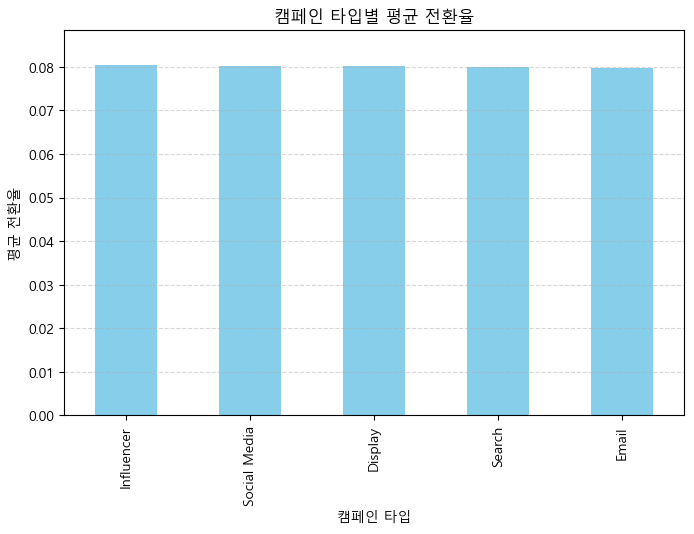

In [24]:
# 캠페인 타입별 전환율 계산
campaign_type_conv = new_df.groupby('Campaign_Type')['Conversion_Rate'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(8, 5))
campaign_type_conv.plot(kind='bar', color='skyblue')
plt.title('캠페인 타입별 평균 전환율')
plt.xlabel('캠페인 타입')
plt.ylabel('평균 전환율')
plt.ylim(0, campaign_type_conv.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

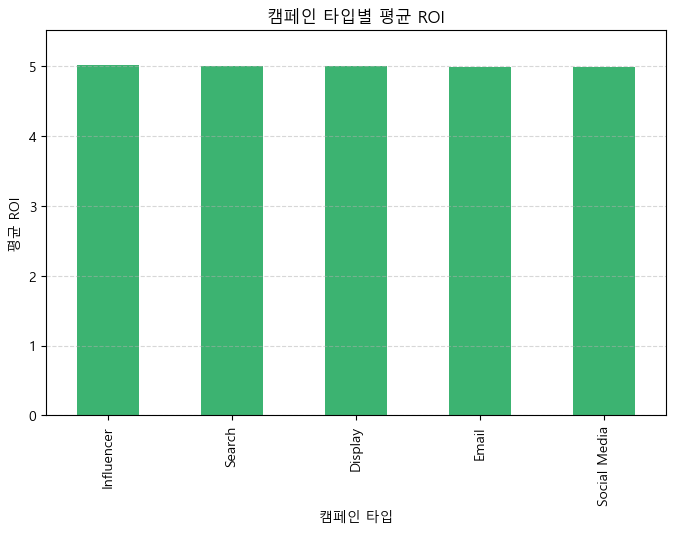

In [25]:
# 캠페인 타입별 평균 ROI 계산
campaign_type_roi = new_df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(8, 5))
campaign_type_roi.plot(kind='bar', color='mediumseagreen')
plt.title('캠페인 타입별 평균 ROI')
plt.xlabel('캠페인 타입')
plt.ylabel('평균 ROI')
plt.ylim(0, campaign_type_roi.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

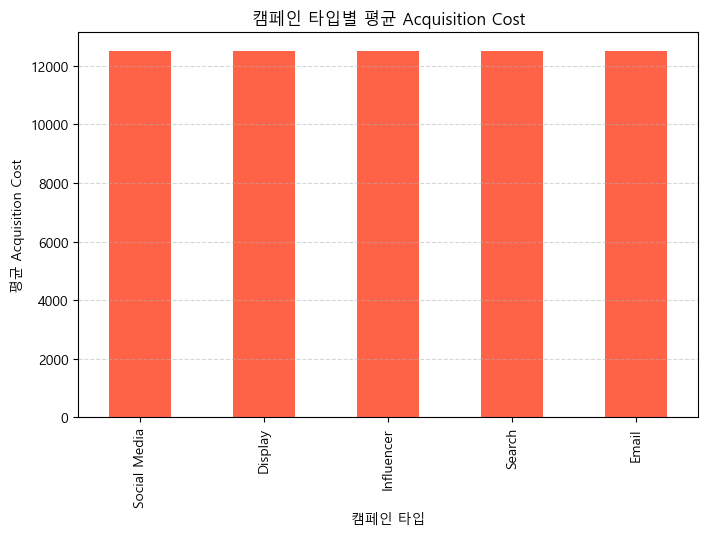

In [26]:
# 'Acquisition_Cost' 컬럼에서 '$'와 ','를 제거하고 float으로 변환
new_df['Acquisition_Cost_num'] = new_df['Acquisition_Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# 캠페인 타입별 평균 Acquisition Cost 계산
campaign_type_acq = new_df.groupby('Campaign_Type')['Acquisition_Cost_num'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(8, 5))
campaign_type_acq.plot(kind='bar', color='tomato')
plt.title('캠페인 타입별 평균 Acquisition Cost')
plt.xlabel('캠페인 타입')
plt.ylabel('평균 Acquisition Cost')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

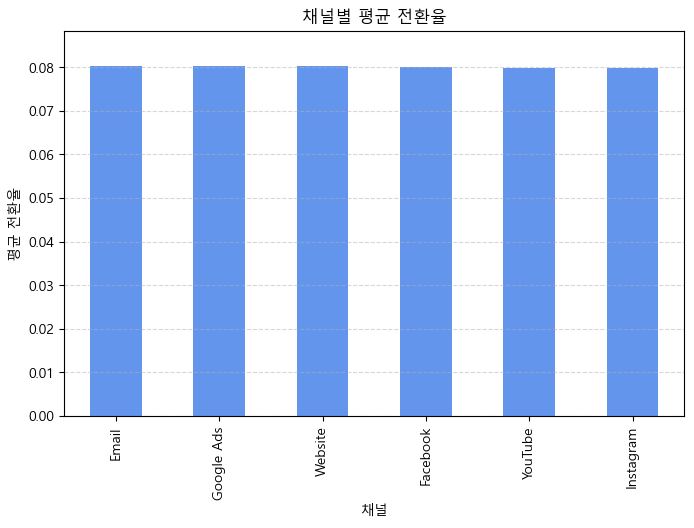

In [27]:
# 채널별 평균 전환율 계산
channel_conv = new_df.groupby('Channel_Used')['Conversion_Rate'].mean().sort_values(ascending=False)

# 그래프 그리기
plt.figure(figsize=(8, 5))
channel_conv.plot(kind='bar', color='cornflowerblue')
plt.title('채널별 평균 전환율')
plt.xlabel('채널')
plt.ylabel('평균 전환율')
plt.ylim(0, channel_conv.max() * 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

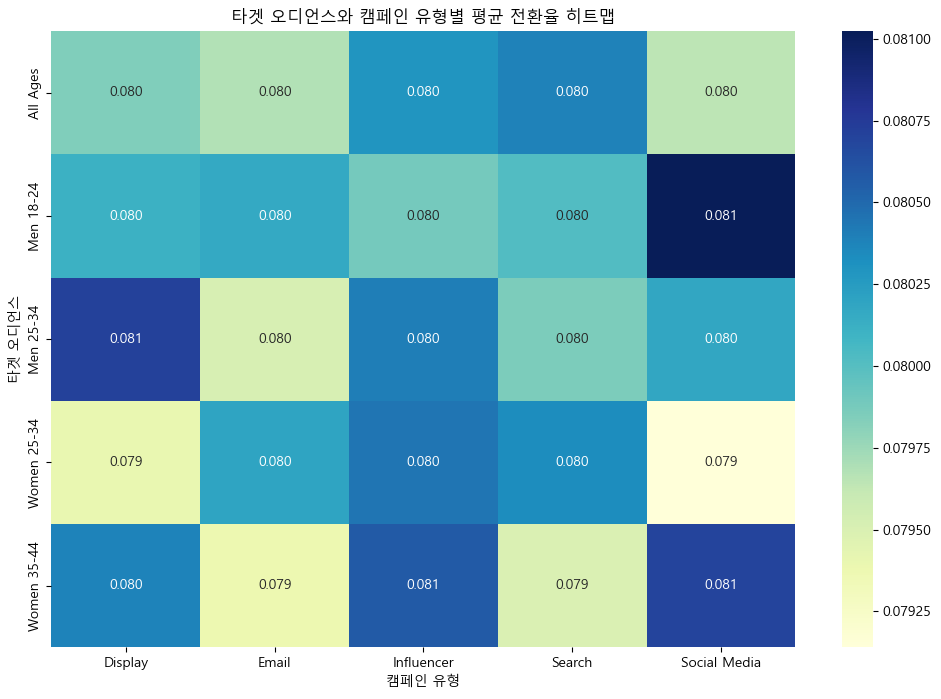

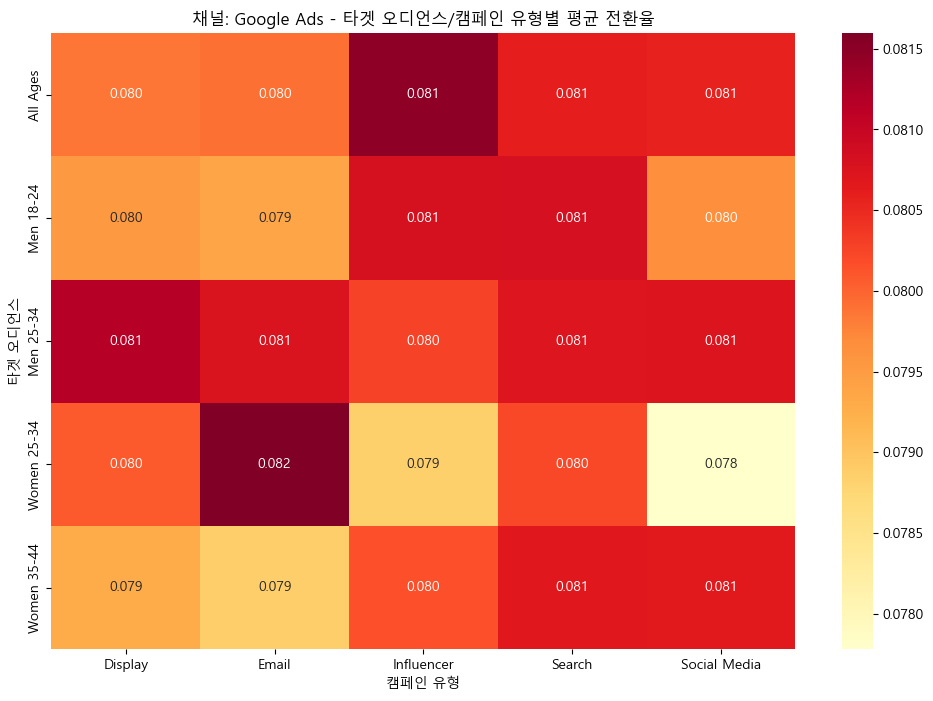

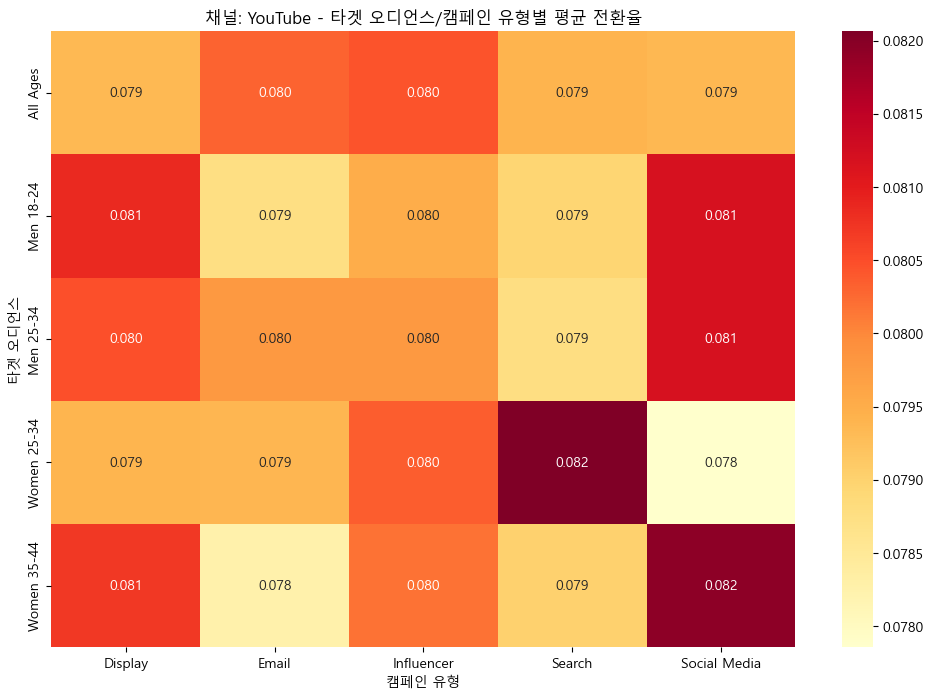

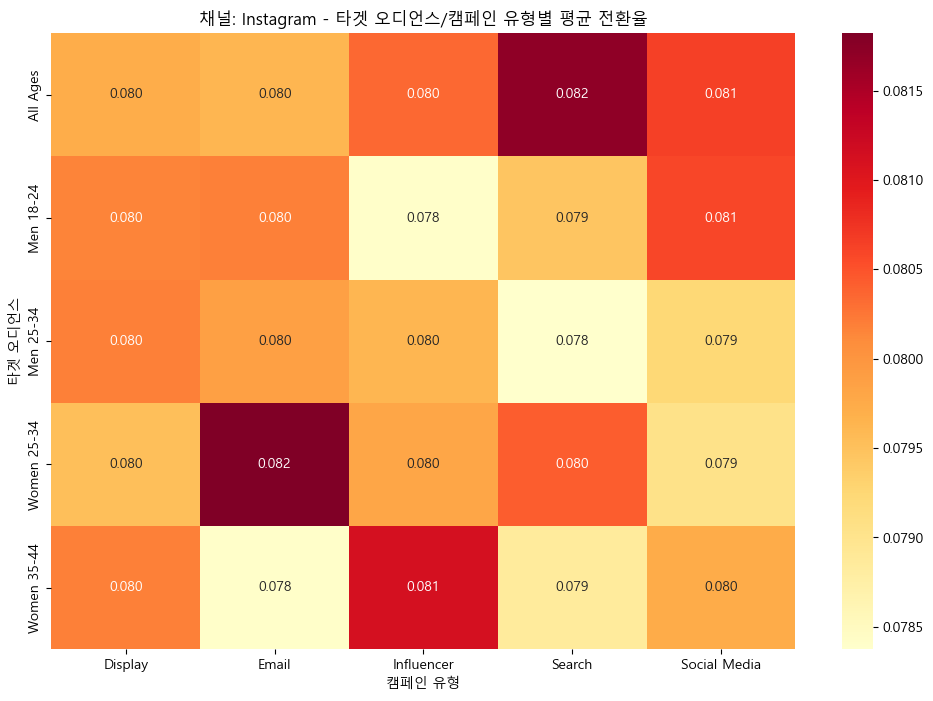

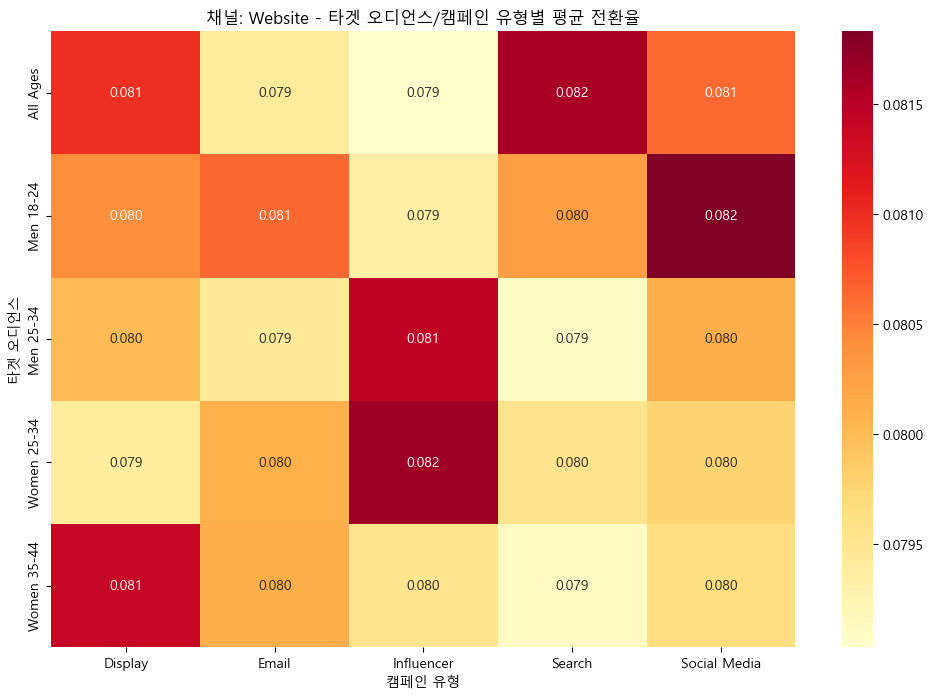

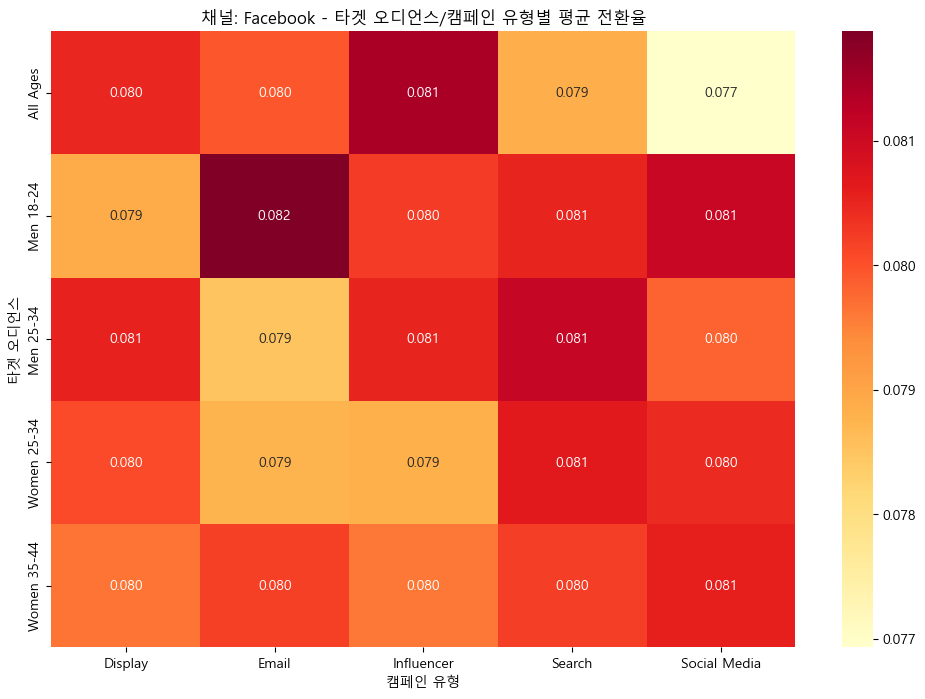

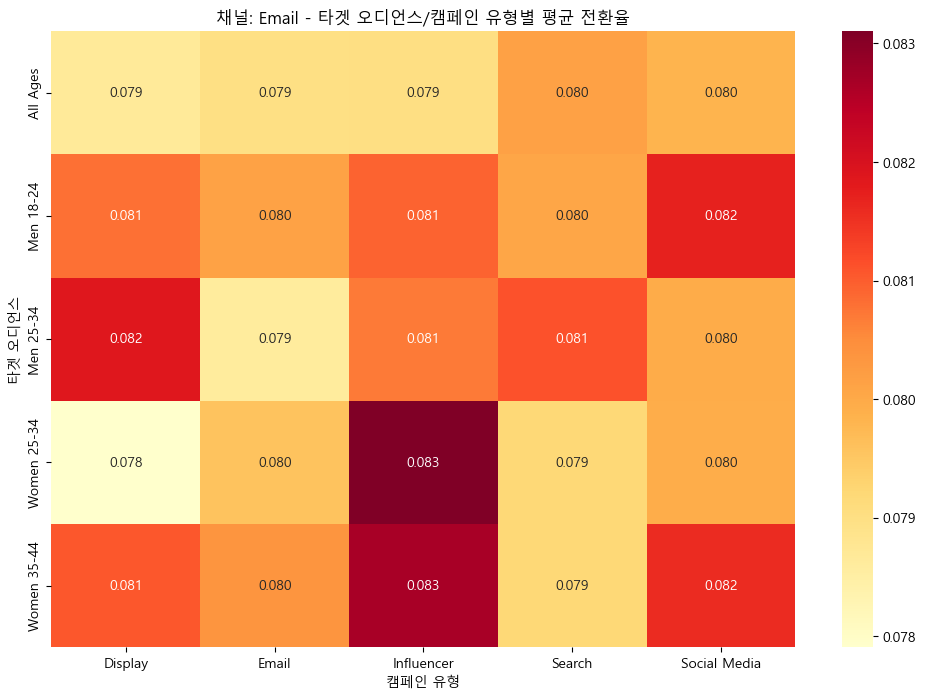

In [28]:
import seaborn as sns

# 피벗 테이블 생성: 행=Target_Audience, 열=Campaign_Type, 값=Channel_Used별 평균 전환율
pivot_table = new_df.pivot_table(
    index='Target_Audience',
    columns='Campaign_Type',
    values='Conversion_Rate',
    aggfunc='mean'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap='YlGnBu')
plt.title('타겟 오디언스와 캠페인 유형별 평균 전환율 히트맵')
plt.xlabel('캠페인 유형')
plt.ylabel('타겟 오디언스')
plt.show()

# 사용채널별로도 보고 싶다면, 3차원 피벗이 필요하므로 아래와 같이 반복해서 그릴 수 있음
for channel in new_df['Channel_Used'].unique():
    channel_pivot = new_df[new_df['Channel_Used'] == channel].pivot_table(
        index='Target_Audience',
        columns='Campaign_Type',
        values='Conversion_Rate',
        aggfunc='mean'
    )
    plt.figure(figsize=(12, 8))
    sns.heatmap(channel_pivot, annot=True, fmt=".3f", cmap='YlOrRd')
    plt.title(f'채널: {channel} - 타겟 오디언스/캠페인 유형별 평균 전환율')
    plt.xlabel('캠페인 유형')
    plt.ylabel('타겟 오디언스')
    plt.show()

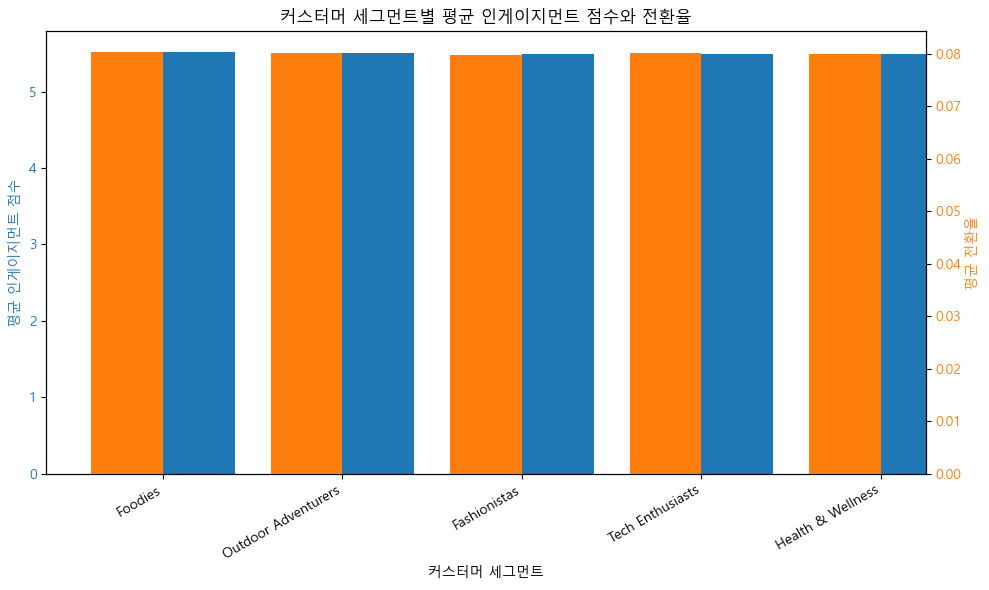

In [29]:
# 커스터머 세그먼트별 평균 인게이지먼트 점수와 평균 전환율 계산
segment_stats = new_df.groupby('Customer_Segment')[['Engagement_Score', 'Conversion_Rate']].mean().sort_values('Engagement_Score', ascending=False)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
segment_stats['Engagement_Score'].plot(kind='bar', ax=ax1, color=color, position=0, width=0.4, label='평균 인게이지먼트 점수')
ax1.set_ylabel('평균 인게이지먼트 점수', color=color)
ax1.set_xlabel('커스터머 세그먼트')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(segment_stats.index, rotation=30, ha='right')

# 전환율은 보조 y축에 표시
ax2 = ax1.twinx()
color = 'tab:orange'
segment_stats['Conversion_Rate'].plot(kind='bar', ax=ax2, color=color, position=1, width=0.4, label='평균 전환율')
ax2.set_ylabel('평균 전환율', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('커스터머 세그먼트별 평균 인게이지먼트 점수와 전환율')
fig.tight_layout()
plt.show()

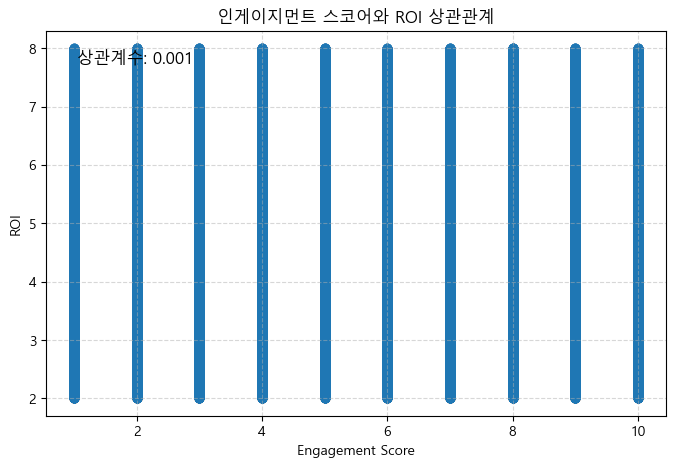

In [30]:
# 인게이지먼트 스코어와 ROI의 상관관계 산점도 및 상관계수 계산
plt.figure(figsize=(8, 5))
plt.scatter(new_df['Engagement_Score'], new_df['ROI'], alpha=0.3)
plt.title('인게이지먼트 스코어와 ROI 상관관계')
plt.xlabel('Engagement Score')
plt.ylabel('ROI')
plt.grid(True, linestyle='--', alpha=0.5)

# 상관계수 계산 및 출력
corr = new_df['Engagement_Score'].corr(new_df['ROI'])
plt.text(
    0.05, 0.95,
    f'상관계수: {corr:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.show()

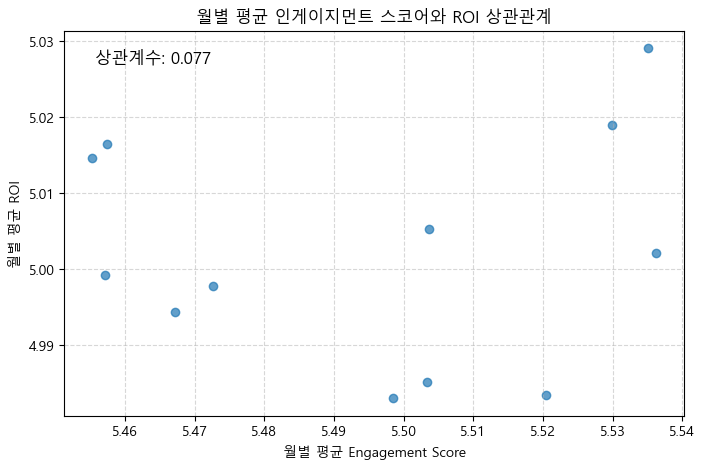

In [31]:
# 'Date' 컬럼을 datetime으로 변환
new_df['Date'] = pd.to_datetime(new_df['Date'])

# 월별로 그룹화하여 평균 인게이지먼트 스코어와 평균 ROI 계산
new_df['month'] = new_df['Date'].dt.to_period('M')
monthly_stats = new_df.groupby('month')[['Engagement_Score', 'ROI']].mean()

# 산점도 및 상관계수 시각화
plt.figure(figsize=(8, 5))
plt.scatter(monthly_stats['Engagement_Score'], monthly_stats['ROI'], alpha=0.7)
plt.title('월별 평균 인게이지먼트 스코어와 ROI 상관관계')
plt.xlabel('월별 평균 Engagement Score')
plt.ylabel('월별 평균 ROI')
plt.grid(True, linestyle='--', alpha=0.5)

# 상관계수 계산 및 출력
monthly_corr = monthly_stats['Engagement_Score'].corr(monthly_stats['ROI'])
plt.text(
    0.05, 0.95,
    f'상관계수: {monthly_corr:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top'
)
plt.show()

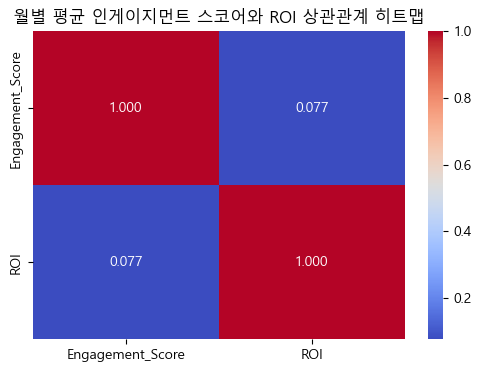

In [32]:
import seaborn as sns

# 월별 평균 인게이지먼트 스코어와 ROI의 상관관계 히트맵

# monthly_stats 데이터프레임의 상관계수 행렬 계산
corr_matrix = monthly_stats.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('월별 평균 인게이지먼트 스코어와 ROI 상관관계 히트맵')
plt.show()